# Fraud Loan Prediction- Project

# Observation:

Fraud Loan Prediction to find out Whether to give loan to a person or not based on the information.

In [1]:
#importing essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset :
df=pd.read_csv('loan_prediction.csv')

In [3]:
# lets check the first five records :
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#lets check the last five records:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# EDA Process

In [5]:
# shape of the dataset (rows and columns) :
df.shape

(614, 13)

In [6]:
# total information of the dataset :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking the null values

In [7]:
# lets check the nullvalues :
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# lets drop the null values :
data=df.dropna()

In [9]:
# again checking the nullvalues :
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

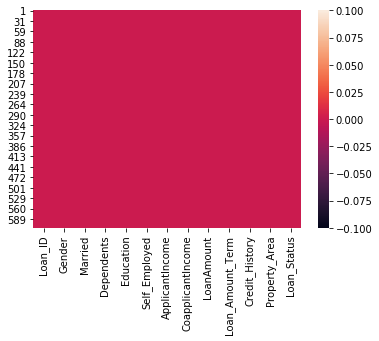

In [10]:
# visualise by the help of heatmap :
sns.heatmap(data.isnull())

In [11]:
# column name of the data (features of the dataset) :
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Now from the below cell we will check all unique values :
Univariate/Bivariate Analysis

In [12]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

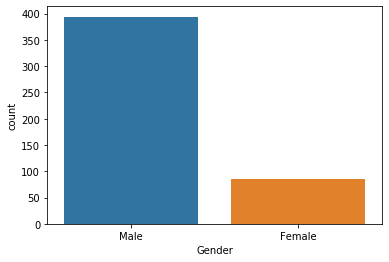

In [13]:
sns.countplot(data['Gender'])

In [14]:
data['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

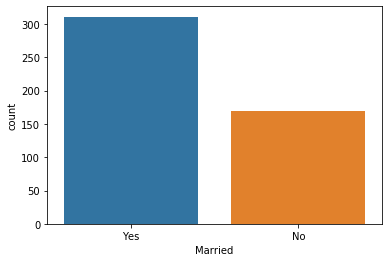

In [15]:
sns.countplot(data['Married'])

In [16]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

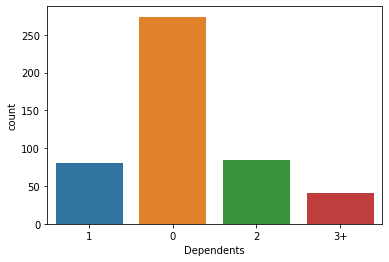

In [17]:
sns.countplot(data['Dependents'])

In [18]:
data['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

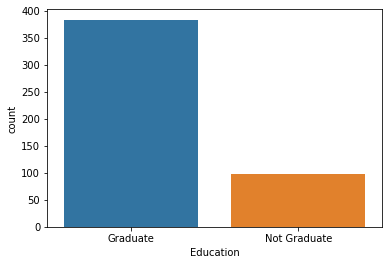

In [19]:
sns.countplot(data['Education'])

In [20]:
data['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

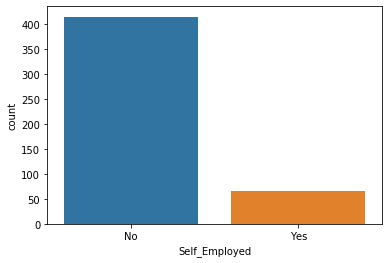

In [21]:
sns.countplot(data['Self_Employed'])

In [22]:
data['ApplicantIncome'].value_counts()

2500    7
4583    6
2600    5
5000    4
8333    4
       ..
5800    1
3762    1
5815    1
6045    1
3691    1
Name: ApplicantIncome, Length: 405, dtype: int64

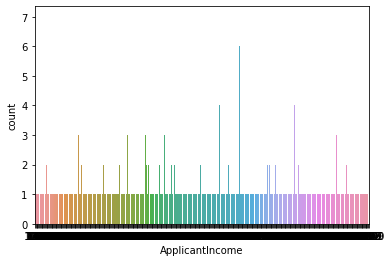

In [23]:
sns.countplot(x='ApplicantIncome',data=data)

In [24]:
data['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

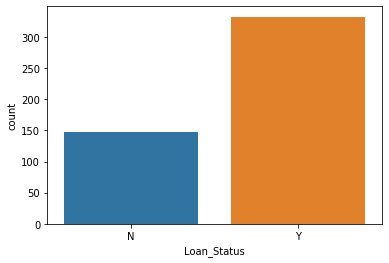

In [25]:
sns.countplot(x='Loan_Status',data=data)

# Stastistical Analysis (lets check mean, std, min) :

In [26]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


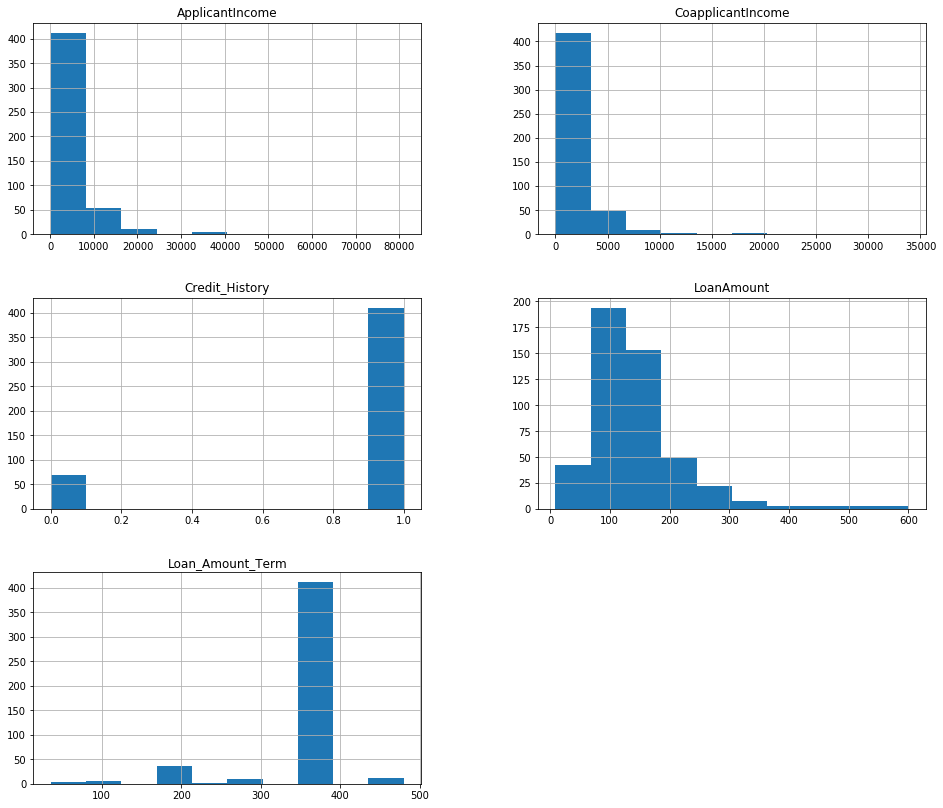

In [27]:

data.hist(figsize=(16,14))
plt.show()

# Checking the outliers

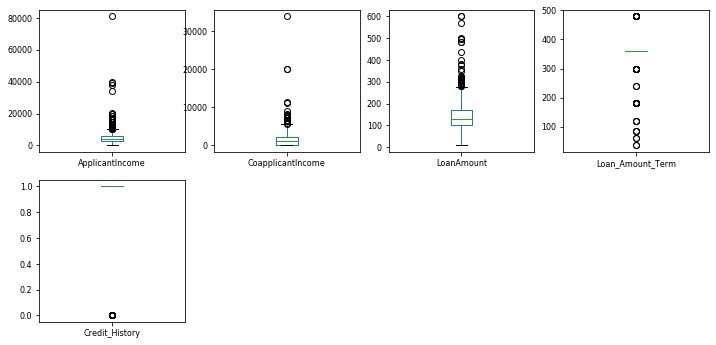

In [28]:
# checking outliers :
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [29]:
# importing the labelencoder to convert object datatypes to numerical values :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i]=le.fit_transform(data[i])

C:\Users\Scp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
data.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [33]:
# lets treat the skewness in the input dataset :
import numpy as np
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.log1p(data[index])
    if data.skew().loc[index]<-0.5:
        data[index]=np.square(data[index])

C:\Users\Scp\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Scp\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [34]:
data.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.604000
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      0.565144
CoapplicantIncome   -0.150104
LoanAmount          -0.375544
Loan_Amount_Term    -1.175625
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

# Correlation Matrix

In [35]:
# corelation among the featues :
dfr=data.corr()
dfr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.023210,0.005776,0.082004,0.028438,0.049772,0.048989,-0.044915,0.037537,-0.000890,-0.018872,-0.197603,0.040306
Gender,-0.023210,1.000000,0.349424,0.214395,0.059245,-0.002761,0.041763,0.243552,0.147118,-0.097141,0.022447,-0.000204,0.064504
Married,0.005776,0.349424,1.000000,0.406223,0.001652,0.015674,0.009948,0.316312,0.207523,-0.125021,0.029095,0.038653,0.112321
Dependents,0.082004,0.214395,0.406223,1.000000,0.024488,0.059163,0.148275,0.030133,0.169962,-0.103948,-0.020135,0.026534,0.034565
Education,0.028438,0.059245,0.001652,0.024488,1.000000,-0.005085,-0.166395,0.038369,-0.154221,-0.087213,-0.056656,-0.055005,-0.068437
Self_Employed,0.049772,-0.002761,0.015674,0.059163,-0.005085,1.000000,0.234526,-0.079302,0.111651,-0.045961,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.048989,0.041763,0.009948,0.148275,-0.166395,0.234526,1.000000,-0.357522,0.498086,-0.052740,0.005567,-0.046895,-0.003335
CoapplicantIncome,-0.044915,0.243552,0.316312,0.030133,0.038369,-0.079302,-0.357522,1.000000,0.158516,0.013778,-0.001839,-0.049060,0.061193
LoanAmount,0.037537,0.147118,0.207523,0.169962,-0.154221,0.111651,0.498086,0.158516,1.000000,0.080918,-0.048782,-0.141260,-0.056937
Loan_Amount_Term,-0.000890,-0.097141,-0.125021,-0.103948,-0.087213,-0.045961,-0.052740,0.013778,0.080918,1.000000,0.033877,-0.046251,-0.029010


# plt.figure(figsize=(14,10))
sns.heatmap(dfr,annot=True)
plt.show()

# Splitting the dataset

In [36]:
# spliting the data into input and target feature :
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=55)

# Importing scikit-learn libraries

In [38]:
# importing the libraries :
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Use for loop to check with multiple algorithmns

In [39]:
# importing essential libraries :
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('>>>>>>>>>>>>>>>>Accuracy score of<<<<<<<<<<<<<<<<<<<<<',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

>>>>>>>>>>>>>>>>Accuracy score of<<<<<<<<<<<<<<<<<<<<< LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.75
[[ 0 24]
 [ 0 72]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.75      1.00      0.86        72

    accuracy                           0.75        96
   macro avg       0.38      0.50      0.43        96
weighted avg       0.56      0.75      0.64        96



>>>>>>>>>>>>>>>>Accuracy score of<<<<<<<<<<<<<<<<<<<<< DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min

C:\Users\Scp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>>>>>>>>>>>>>>>>Accuracy score of<<<<<<<<<<<<<<<<<<<<< RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
0.875
[[13 11]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68        24
           1       0.87      0.99      0.92        72

    accuracy                           0.88        96
   macro avg       0.90      0.76      0.80        96
weighted avg       0.88      0.88      0.86        96





# Cross_val_score

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [41]:
cross_val_score(rfc,X,y).mean()

0.8020833333333333

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_predict=rfc.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

# roc_auc_score

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_predict=rfc.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

In [45]:
fpr,tpr,thresholds=roc_curve(y_test,y_predict)

In [46]:
fpr

array([0.        , 0.45833333, 1.        ])

In [47]:
tpr

array([0.        , 0.95833333, 1.        ])

In [48]:
thresholds

array([2, 1, 0])

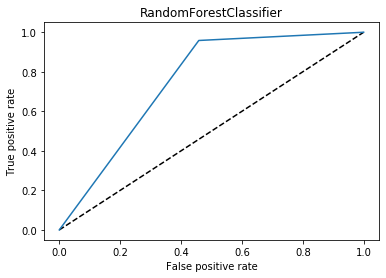

In [49]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [50]:
auc_score=roc_auc_score(y_test,rfc.predict(X_test))
print(auc_score)


0.7500000000000001


# Conclusion-We will go with RandomForestClasifier.As it has more accuracy

In [51]:
# saving the model :
import joblib
joblib.dump(rfc,'LoanPrediction.obj')

['LoanPrediction.obj']